<a href="https://colab.research.google.com/github/paigekan/Machine-Learning/blob/main/Week4_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import the Credit Card Fraud Data From CCLE

In [33]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [34]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [35]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/fraudTest.csv")

In [36]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Select four columns to use as features (one just be trans_date_trans)

In [37]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [38]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

Create a unique variable out of trans_date.

In [39]:
type(df["trans_date_trans_time"][0])

str

In [40]:
# Convert 'trans_date_trans_type' to datetime
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-40-aee1eab833a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [41]:
type(df_select["trans_date_trans_time"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
from datetime import datetime as dt

In [43]:
# Create dummy variable to identify whether the transaction occured between midnight and 4 am
a = dt.strptime('00:00:00', '%H:%M:%S').time()
b = dt.strptime('04:00:00', '%H:%M:%S').time()

res = (df_select['trans_date_trans_time'].dt.time >= a) & (df_select['trans_date_trans_time'].dt.time <= b)
df_select.insert(1, 'dummy', res)
df_select

,trans_date_trans_time,dummy,category,amt,city_pop,is_fraud
0,2020-06-21 12:14:25,False,personal_care,2.86,333497,0
1,2020-06-21 12:14:33,False,personal_care,29.84,302,0
2,2020-06-21 12:14:53,False,health_fitness,41.28,34496,0
3,2020-06-21 12:15:15,False,misc_pos,60.05,54767,0
4,2020-06-21 12:15:17,False,travel,3.19,1126,0
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,False,health_fitness,43.77,519,0
555715,2020-12-31 23:59:09,False,kids_pets,111.84,28739,0
555716,2020-12-31 23:59:15,False,kids_pets,86.88,3684,0
555717,2020-12-31 23:59:24,False,travel,7.99,129,0


In [44]:
# Create dummies for factor variables
X = pd.get_dummies(df_select, columns = ["category", "dummy"]).drop(["trans_date_trans_time", "is_fraud"], axis =1)
y = df["is_fraud"]

In [45]:
X.head()

,amt,city_pop,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,dummy_False,dummy_True
0,2.86,333497,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,29.84,302,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,41.28,34496,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,60.05,54767,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,3.19,1126,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [76]:
X_train

,amt,city_pop,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,dummy_False,dummy_True
343066,7.08,3508,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
459874,49.36,337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
445330,74.33,828,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
339523,283.91,378909,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
94876,36.60,836,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277685,1.96,158701,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
212851,72.55,1988,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
137670,460.75,2142,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
199580,91.41,4154,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [48]:
y_train

343066    0
459874    0
445330    0
339523    0
94876     0
         ..
277685    0
212851    0
137670    0
199580    0
358877    0
Name: is_fraud, Length: 389003, dtype: int64

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [49]:
# Training data for oversample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

In [50]:
# Training data for undersample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train,y_train)

In [51]:
# Training data for SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

In [57]:
# (1) Logistic Regression: Oversample

# Standardization
over_X_normalized = scaler.fit_transform(over_X)

# Fit logistic regression 
log_reg_over = LogisticRegression().fit(over_X_normalized, over_y)

LogisticRegression()

In [58]:
# (2) Logistic Regression: Undersample

# Standardization
under_X_normalized = scaler.fit_transform(under_X)

# Fit logistic regression 
log_reg_under = LogisticRegression().fit(under_X_normalized, under_y)

In [59]:
# (3) Logistic Regression: SMOTE

# Standardization
smote_X_normalized = scaler.fit_transform(smote_X)

# Fit logistic regression 
log_reg_smote = LogisticRegression().fit(smote_X_normalized, smote_y)

# 4.) Test the three models

In [61]:
# (1) Logistic Regression: Oversample

# Make predictions on the test set
over_y_pred = log_reg_over.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [62]:
# (2) Logistic Regression: Undersample

# Make predictions on the test set
under_y_pred = log_reg_under.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [63]:
# (3) Logistic Regression: SMOTE

# Make predictions on the test set
smote_y_pred = log_reg_smote.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# 5.) Which performed best in Out of Sample metrics?

In [75]:
from sklearn.metrics import roc_auc_score

In [77]:
# (1) Logistic Regression: Oversample

logit_auc_over = roc_auc_score(y_test, log_reg_over.predict_proba(X_test)[:,1])
logit_auc_over

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6387116154718262

In [78]:
# (2) Logistic Regression: Undersample

logit_auc_under = roc_auc_score(y_test, log_reg_under.predict_proba(X_test)[:,1])
logit_auc_under

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6440502068883174

In [79]:
# (3) Logistic Regression: SMOTE

logit_auc_smote = roc_auc_score(y_test, log_reg_smote.predict_proba(X_test)[:,1])
logit_auc_smote

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6453105237997024

Based on the ROC curve and AUC, SMOTE had the best out of sample performance.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [98]:
# Before SMOTE
raw_temp = pd.concat([X_train, y_train], axis =1)

In [99]:
# Two features before SMOTE
raw_temp[raw_temp['is_fraud'] == 1]['amt']
raw_temp[raw_temp['is_fraud'] == 1]['city_pop']

raw_temp[raw_temp['is_fraud'] == 0]['amt']
raw_temp[raw_temp['is_fraud'] == 0]['city_pop']

343066      3508
459874       337
445330       828
339523    378909
94876        836
           ...  
277685    158701
212851      1988
137670      2142
199580      4154
358877       206
Name: city_pop, Length: 387525, dtype: int64

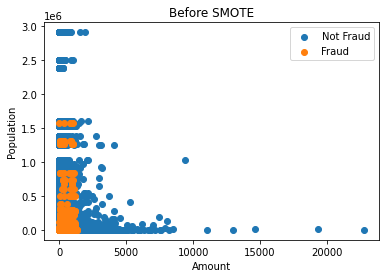

In [117]:
# Plot the features
plt.scatter(raw_temp[raw_temp['is_fraud'] == 0]['amt'],raw_temp[raw_temp['is_fraud'] == 0]['city_pop'], label = 'Not Fraud')
plt.scatter(raw_temp[raw_temp['is_fraud'] == 1]['amt'],raw_temp[raw_temp['is_fraud'] == 1]['city_pop'], label = 'Fraud')

plt.legend()
plt.title('Before SMOTE')
plt.xlabel('Amount')
plt.ylabel('Population')

plt.show()


In [103]:
# After SMOTE
after_temp = pd.concat([smote_X, smote_y], axis =1)

In [104]:
# Two features after SMOTE
after_temp[after_temp['is_fraud'] == 1]['amt']
after_temp[after_temp['is_fraud'] == 1]['city_pop']

after_temp[after_temp['is_fraud'] == 0]['amt']
after_temp[after_temp['is_fraud'] == 0]['city_pop']

0           3508
1            337
2            828
3         378909
4            836
           ...  
388998    158701
388999      1988
389000      2142
389001      4154
389002       206
Name: city_pop, Length: 387525, dtype: int64

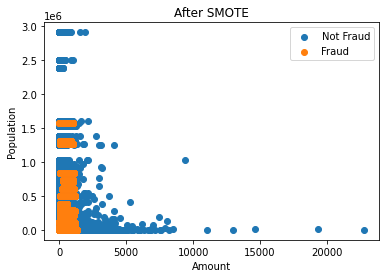

In [116]:
# Plot the two features
plt.scatter(after_temp[after_temp['is_fraud'] == 0]['amt'],after_temp[after_temp['is_fraud'] == 0]['city_pop'], label = 'Not Fraud')
plt.scatter(after_temp[after_temp['is_fraud'] == 1]['amt'],after_temp[after_temp['is_fraud'] == 1]['city_pop'], label = 'Fraud')

plt.legend()
plt.title('After SMOTE')
plt.xlabel('Amount')
plt.ylabel('Population')

plt.show()